In [2]:
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.tree import export_text

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split    
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import datasets

import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
from xgboost import XGBClassifier, plot_tree as xgb_plot_tree

In [3]:
# Carregar o dataset MNIST
digits = datasets.load_digits(n_class=10)

images=digits.images
targets=digits.target

#Redimensionar matrix
images=images.reshape(len(images),8*8)

X = digits.data
y = digits.target

# Criar nomes de características
n_pixels = X.shape[1]
feature_names = [f'pixel_{i}' for i in range(n_pixels)]

# Dividir o dataset em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(images, targets, test_size=0.2)

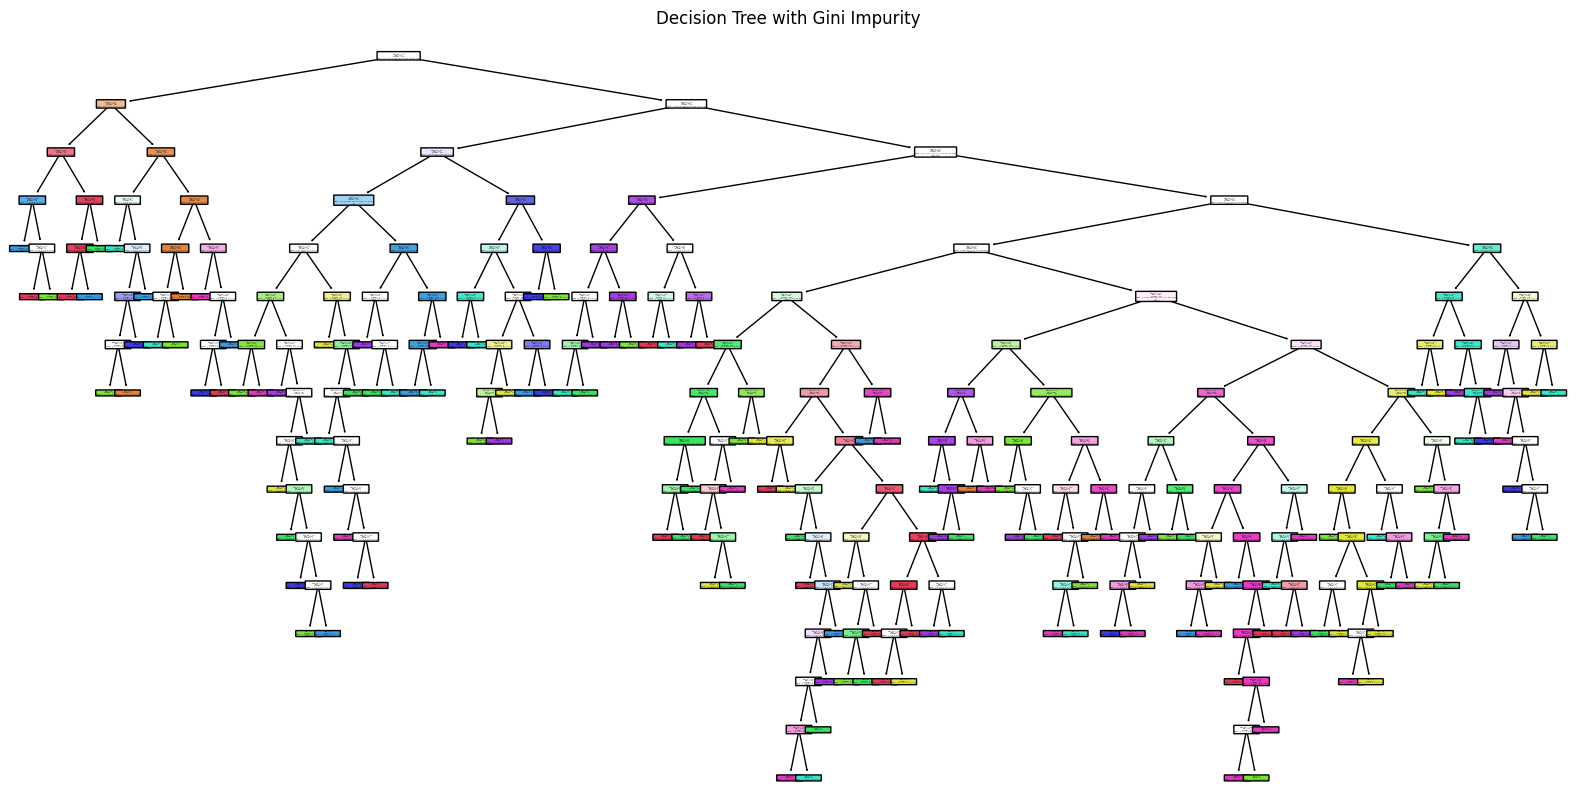

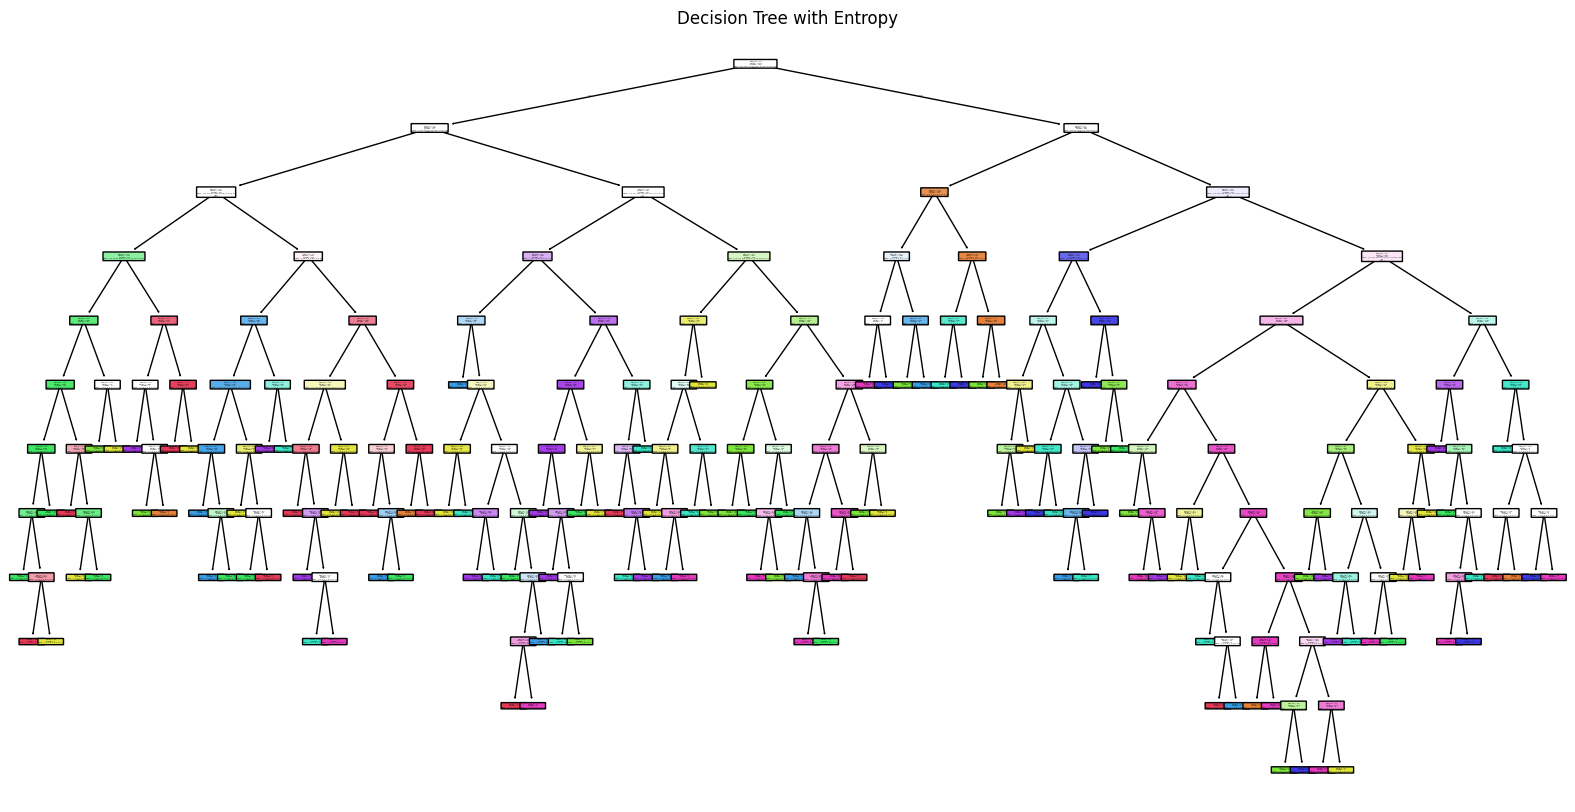

In [4]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt


# Dividir o dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar o modelo DecisionTreeClassifier com diferentes critérios
clf_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
clf_gini.fit(X_train, y_train)

clf_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf_entropy.fit(X_train, y_train)

# Visualizar árvores com diferentes medidas de impureza
def plot_tree_with_impurity(clf, feature_names, class_names, title):
    plt.figure(figsize=(20,10))
    plot_tree(clf, feature_names=feature_names, class_names=class_names, filled=True, rounded=True)
    plt.title(title)
    plt.show()

# Feature names for digits dataset
feature_names = [f'pixel_{i}' for i in range(X.shape[1])]
class_names = [str(i) for i in range(10)]

plot_tree_with_impurity(clf_gini, feature_names, class_names, "Decision Tree with Gini Impurity")
plot_tree_with_impurity(clf_entropy, feature_names, class_names, "Decision Tree with Entropy")


Resultados para Decision Tree with Gini Impurity:
Accuracy: 84.17%
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.97      0.88      0.92        33
           1       0.85      0.79      0.81        28
           2       0.86      0.73      0.79        33
           3       0.76      0.85      0.81        34
           4       0.84      0.91      0.88        46
           5       0.89      0.85      0.87        47
           6       0.97      0.91      0.94        35
           7       0.82      0.91      0.86        34
           8       0.75      0.70      0.72        30
           9       0.75      0.82      0.79        40

    accuracy                           0.84       360
   macro avg       0.84      0.84      0.84       360
weighted avg       0.85      0.84      0.84       360

Matriz de Confusão:


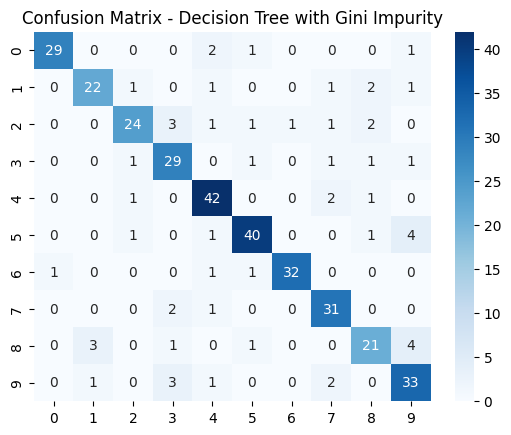

Resultados para Decision Tree with Entropy:
Accuracy: 88.89%
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        33
           1       0.93      0.93      0.93        28
           2       0.90      0.79      0.84        33
           3       0.91      0.85      0.88        34
           4       0.80      0.87      0.83        46
           5       0.96      0.96      0.96        47
           6       0.91      0.91      0.91        35
           7       0.83      0.88      0.86        34
           8       0.86      0.83      0.85        30
           9       0.88      0.90      0.89        40

    accuracy                           0.89       360
   macro avg       0.89      0.89      0.89       360
weighted avg       0.89      0.89      0.89       360

Matriz de Confusão:


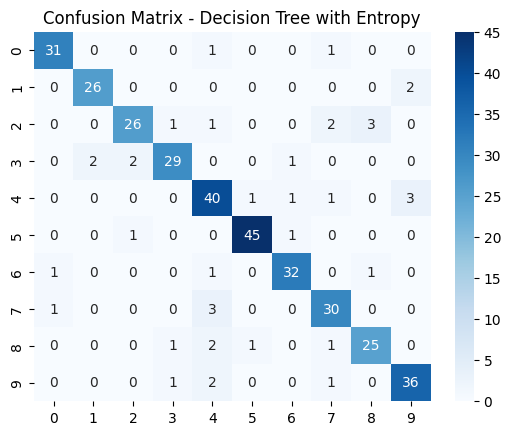

In [5]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

def evaluate_model(y_test, y_pred, model_name):
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Resultados para {model_name}:")
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print("Relatório de Classificação:")
    print(classification_report(y_test, y_pred))
    print("Matriz de Confusão:")
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=[str(i) for i in range(10)], yticklabels=[str(i) for i in range(10)])
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

# Previsões
y_pred_gini = clf_gini.predict(X_test)
y_pred_entropy = clf_entropy.predict(X_test)

# Avaliar Modelos
evaluate_model(y_test, y_pred_gini, "Decision Tree with Gini Impurity")
evaluate_model(y_test, y_pred_entropy, "Decision Tree with Entropy")
